In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=[<tf.Tenso...)`


Found 352 images belonging to 2 classes.
Found 232 images belonging to 2 classes.
Epoch 1/500
176/176 [==============================] - 41s 235ms/step - loss: 2.5250 - acc: 0.5540 - val_loss: 3.9016 - val_acc: 0.5690
Epoch 2/500
176/176 [==============================] - 19s 108ms/step - loss: 3.4782 - acc: 0.5341 - val_loss: 2.7676 - val_acc: 0.5302
Epoch 3/500
176/176 [==============================] - 19s 108ms/step - loss: 2.6748 - acc: 0.6108 - val_loss: 4.4566 - val_acc: 0.5086
Epoch 4/500
176/176 [==============================] - 19s 108ms/step - loss: 1.7771 - acc: 0.5881 - val_loss: 3.1346 - val_acc: 0.4914
Epoch 5/500
176/176 [==============================] - 19s 108ms/step - loss: 1.3155 - acc: 0.6080 - val_loss: 2.4457 - val_acc: 0.5043
Epoch 6/500
176/176 [==============================] - 19s 108ms/step - loss: 1.0929 - acc: 0.6648 - val_loss: 2.6192 - val_acc: 0.5043
Epoch 7/500
176/176 [==============================] - 19s 107ms/step - loss: 1.0811 - acc: 0.6222 - v

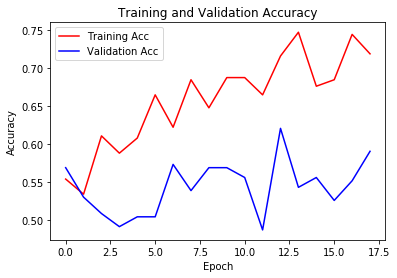

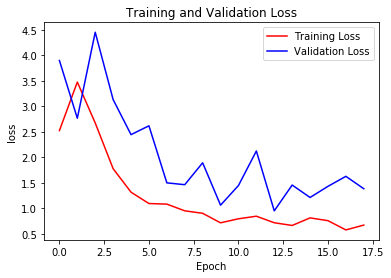

232/232 [==============================] - 9s 41ms/step
[INFO] Accuracy: 58.41%
[INFO] Loss: 0.962648857412895
[INFO] Time Elapsed:  0:09:51.124082


In [7]:


#
# **************************************************************************************************************************************************
#	Libraries
# **************************************************************************************************************************************************
#

from keras import optimizers
from keras import applications
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import ceil

import numpy as np
import pandas as pd
import datetime
import json
import matplotlib.pyplot as plt

#
# **************************************************************************************************************************************************
#	Global Variables
# **************************************************************************************************************************************************
#

# dimensions of architecture
img_width, img_height = 224, 224

# saved filename of model
model_filename = '/content/drive/My Drive/Colab Notebooks/model.h5'

# saved filename of model weights
weights_filename = '/content/drive/My Drive/Colab Notebooks/weights.h5'
modelcheckpoint_filename = '/content/drive/My Drive/Colab Notebooks/model_checkpoint.h5'

# savae filename of results csv
results_filename = '/content/drive/My Drive/Colab Notebooks/results.csv'

# datasets' directories
train_data_dir = '/content/drive/My Drive/Colab Notebooks/train/'
# validation_data_dir = '/content/drive/My Drive/Colab Notebooks/validation/'
test_data_dir = '/content/drive/My Drive/Colab Notebooks/test/'

# number of channels for the architecture
channels = 3

# number of epochs
epochs = 500

# batch size 
train_batch_size = 2
validation_batch_size = 2

# learning rate
learning_rate = 0.0001

# class mode
class_mode = 'categorical'

# total number of classes
total_classes = 2

#
# **************************************************************************************************************************************************
#	Functions
# **************************************************************************************************************************************************
#
def summary():
	# model summary
	resnet50.summary()

	# graphing our training and validation
	acc = history.history['acc']
	val_acc = history.history['val_acc']
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	epochs = range(len(acc))
	plt.plot(epochs, acc, 'r', label='Training Acc')
	plt.plot(epochs, val_acc, 'b', label='Validation Acc')
	plt.title('Training and Validation Accuracy')
	plt.ylabel('Accuracy')
	plt.xlabel('Epoch')
	plt.legend()
	plt.figure()
	plt.plot(epochs, loss, 'r', label='Training Loss')
	plt.plot(epochs, val_loss, 'b', label='Validation Loss')
	plt.title('Training and Validation Loss')
	plt.ylabel('loss')
	plt.xlabel('Epoch')
	plt.legend()
	plt.show()
 
def saveModel():
  model.save(model_filename)
  model.save_weights(weights_filename)

  model_json = model.to_json()
  with open("model_in_json.json","w") as json_file:
    json.dump(model_json, json_file)


#
# **************************************************************************************************************************************************
#	Main Code
# **************************************************************************************************************************************************
#

# loading resnet50 model
model = applications.ResNet50(include_top = False, weights = 'imagenet', classes = total_classes, input_shape=(img_width, img_height, channels))
flat = Flatten()(model.layers[-1].output)
output = Dense(total_classes, activation='softmax')(flat)
resnet50 = Model(input=model.inputs,outputs = output)

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                    rotation_range = 90,
                                    brightness_range = [0.2, 1.0],
                                    shear_range = 0.2,
                                    zoom_range = 0.3,
                                    width_shift_range = 1.0,
                                    height_shift_range = 1.0,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split = 0.4)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

# current time
start = datetime.datetime.now()

training_set = train_datagen.flow_from_directory(
                                		train_data_dir,
                                		target_size = (img_width, img_height),
                                		batch_size = train_batch_size,
                                		class_mode=class_mode,
																		subset = "training",
																		seed = 42,
                                		shuffle = True)

nb_train_samples = len(training_set.filenames)

# validation data
validation_set = train_datagen.flow_from_directory(
                                  		train_data_dir,
                                  		target_size=(img_width, img_height),
                                  		batch_size=validation_batch_size,
                                  		class_mode=class_mode,
																			subset = "validation",
																			seed = 42,
                                  		shuffle=True)

nb_validation_samples = len(validation_set.filenames)

resnet50.compile(loss = 'categorical_crossentropy',
                 optimizer = optimizers.Adam(lr = learning_rate),
                 metrics = ['acc'])

es = EarlyStopping(monitor = 'val_loss',
                    min_delta = 1e-5,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

mc = ModelCheckpoint(modelcheckpoint_filename,
                        monitor = 'val_loss',
                        mode = 'min',
                        save_weights_only = True,
                        save_best_only = True)

history = resnet50.fit_generator(training_set,
                         steps_per_epoch = nb_train_samples / train_batch_size,
                         epochs = epochs,
												 callbacks = [es,mc],
                         validation_data = validation_set,
                         validation_steps = nb_validation_samples / validation_batch_size)

summary()
saveModel()

(eval_loss, eval_accuracy) = resnet50.evaluate_generator(
 validation_set, steps = nb_validation_samples, verbose = 1)

print("[INFO] Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end = datetime.datetime.now()
elapsed = end - start
print('[INFO] Time Elapsed: ', elapsed)

# # test data
# test_datagen = ImageDataGenerator()
# test_set = test_datagen.flow_from_directory(
#                                   		test_data_dir,
#                                   		target_size = (img_width, img_height),
#                                   		batch_size = 1,
#                                   		class_mode = class_mode,
# 																			seed = 42,
#                                   		shuffle = True)

# step_size_test = test_set.n // test_set.batch_size
# test_set.reset()

# pred = resnet50.predict_generator(test_set,
#                                 steps = step_size_test,
#                                 verbose = 1)

# predicted_class_indices = np.argmax(pred, axis = 1)
# labels = (test_set.class_indices)

# labels = dict((v, k) for k, v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]

# filenames = test_set.filenames
# results = pd.DataFrame({"Filename": filenames,
#                       "Prediction": predictions})
# results.to_csv(results_filename, index = False)